In [204]:
# Importing data manipulation and visualization packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Reading in the dataset

df = pd.read_csv('movies.csv')

In [9]:
# Making a copy of the original dataset

df_copy = df.copy()

In [208]:
# Checking dimensions

df_copy.shape

(5421, 15)

In [12]:
# Checking data types of each column

print(df_copy.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [10]:
# Taking a look at the dataset

df_copy.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## DATA CLEANING

In [13]:
# Using a for loop to check for the percentage amount of missing values in each column

for col in df_copy.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [14]:
# Getting the exact number of missing values in each column

df_copy.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [15]:
# Checking to see the row/record of the 'released' colum that contains a null

print(df_copy[df_copy['released'].isnull()])

                        name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime  2010      NaN    5.6   93000.0   
5730             The Wolfman      R  Drama  2010      NaN    5.8  104000.0   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN     NaN   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN     NaN   

      gross company  runtime  
5728    NaN     NaN      NaN  
5730    NaN     NaN      NaN  


In [16]:
df_copy.shape

(7668, 15)

In [17]:
df_copy.dropna().shape

(5421, 15)

In [18]:
# Removing records with null values

df_copy.dropna(inplace=True)

In [19]:
df_copy.shape

(5421, 15)

In [20]:
df_copy.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0


In [21]:
# Separating information in the 'relessed' column to make the dataset more tidy.

released_split = df_copy['released'].str.split('(')

In [22]:
released_split.head()

0    [June 13, 1980 , United States)]
1     [July 2, 1980 , United States)]
2    [June 20, 1980 , United States)]
3     [July 2, 1980 , United States)]
4    [July 25, 1980 , United States)]
Name: released, dtype: object

In [23]:
df_copy['released_date'] = released_split.str.get(0)

In [24]:
df_copy['released_country'] = released_split.str.get(1)

In [25]:
df_copy.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


In [26]:
df_copy.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_country
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"January 17, 2020",United States)
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"February 14, 2020",United States)
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"January 17, 2020",United States)
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States)
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States)


In [27]:
# Remove 'released' and 'country' columns

df_copy.drop('released', axis=1, inplace=True)
df_copy.drop('country', axis=1, inplace=True)

In [28]:
df_copy.head()

,name,rating,genre,year,score,votes,director,writer,star,budget,gross,company,runtime,released_date,released_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States)


In [29]:
released_year_split = df_copy['released_date'].str.split(',')

In [30]:
released_year_split.head()

0    [June 13,  1980 ]
1     [July 2,  1980 ]
2    [June 20,  1980 ]
3     [July 2,  1980 ]
4    [July 25,  1980 ]
Name: released_date, dtype: object

In [31]:
df_copy['released_year'] = released_year_split.str.get(1)

In [32]:
df_copy.head()

,name,rating,genre,year,score,votes,director,writer,star,budget,gross,company,runtime,released_date,released_country,released_year
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States),1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States),1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States),1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States),1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States),1980


In [33]:
# Remove 'year' column

df_copy.drop('year', axis=1, inplace=True)

In [34]:
df_copy.tail()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released_date,released_country,released_year
7648,Bad Boys for Life,R,Action,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,90000000.0,426505244.0,Columbia Pictures,124.0,"January 17, 2020",United States),2020
7649,Sonic the Hedgehog,PG,Action,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,85000000.0,319715683.0,Paramount Pictures,99.0,"February 14, 2020",United States),2020
7650,Dolittle,PG,Adventure,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,175000000.0,245487753.0,Universal Pictures,101.0,"January 17, 2020",United States),2020
7651,The Call of the Wild,PG,Adventure,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,135000000.0,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States),2020
7652,The Eight Hundred,Not Rated,Action,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States),2020


In [35]:
df_copy.shape

(5421, 15)

In [36]:
# Count duplicates

df_copy.duplicated().sum()

0

In [37]:
# Remove ')' at the end of the values in the 'country' column

df_copy['released_country'] = df_copy['released_country'].str.split(')').str.get(0)
print(df_copy['released_country'].head())

0    United States
1    United States
2    United States
3    United States
4    United States
Name: released_country, dtype: object


In [38]:
df_copy.tail()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released_date,released_country,released_year
7648,Bad Boys for Life,R,Action,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,90000000.0,426505244.0,Columbia Pictures,124.0,"January 17, 2020",United States,2020
7649,Sonic the Hedgehog,PG,Action,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,85000000.0,319715683.0,Paramount Pictures,99.0,"February 14, 2020",United States,2020
7650,Dolittle,PG,Adventure,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,175000000.0,245487753.0,Universal Pictures,101.0,"January 17, 2020",United States,2020
7651,The Call of the Wild,PG,Adventure,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,135000000.0,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States,2020
7652,The Eight Hundred,Not Rated,Action,6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0,"August 28, 2020",United States,2020


## FINDING CORRELATIONS IN DATA

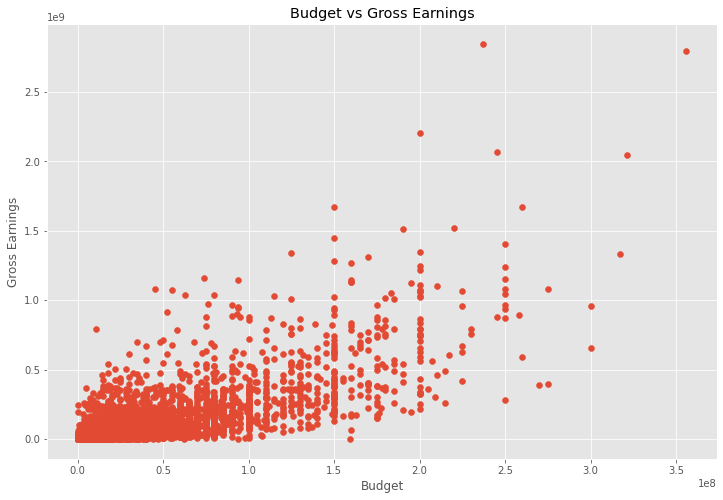

In [205]:
# Scatter plot between budget and gross revenue

plt.scatter(x=df_copy['budget'], y=df_copy['gross'])

plt.title("Budget vs Gross Earnings")

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

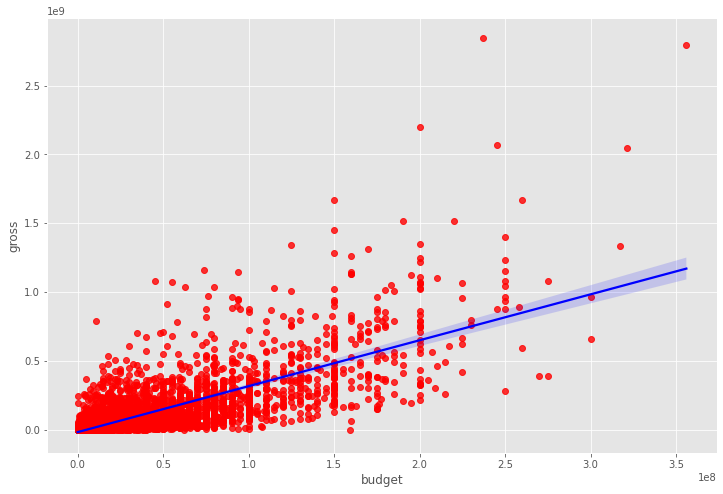

In [206]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df_copy, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [41]:
df_copy.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


In [42]:
df_copy.corr(method='kendall')

,score,votes,budget,gross,runtime
score,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.350185,1.000000,0.346274,0.553625,0.205344
budget,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.292254,0.205344,0.231278,0.176979,1.000000


In [43]:
df_copy.corr(method='spearman')

,score,votes,budget,gross,runtime
score,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.495409,1.000000,0.493461,0.745793,0.300621
budget,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.412155,0.300621,0.330794,0.257400,1.000000


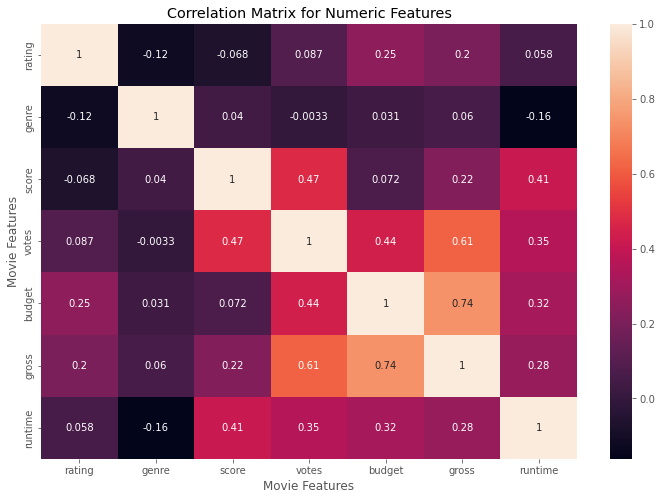

In [207]:
# Visualize correlation matrix

correlation_matrix = df_copy.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

<h4> Budget has a strong correlation to gross earnings.^^ </h4>

In [45]:
# Checking if either 'genre' or 'rating' have a strong correlaion to gross earnings.

df_copy['genre'] = pd.factorize(df_copy['genre'])[0]
df_copy['rating'] = pd.factorize(df_copy['rating'])[0]

df_copy.head()

,name,rating,genre,score,votes,director,writer,star,budget,gross,company,runtime,released_date,released_country,released_year
0,The Shining,0,0,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,0,1,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,1,2,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,1,3,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,0,3,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States,1980


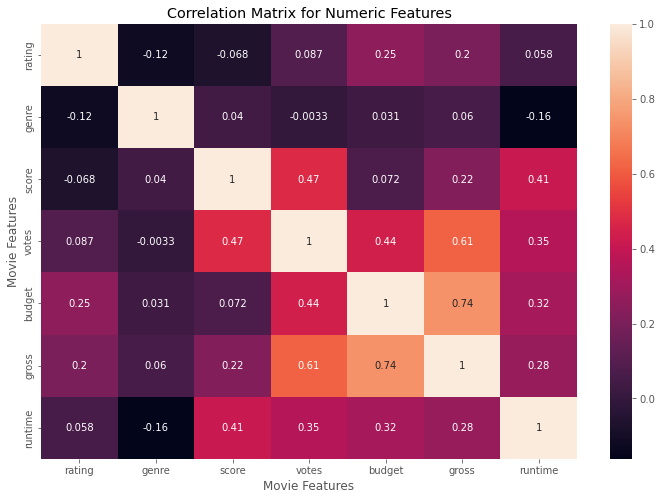

In [46]:
# Visualize a correlation matrix including 'genre' and 'rating'


correlation_matrix = df_copy.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

<h4> Neither Genre nor Rating have a strong correlation to gross earnings.^ </h4>

In [75]:
# Grouping movie names by gross earnings

gg = pd.DataFrame(df_copy.groupby(['name', 'company', 'released_year']).sum()['gross'])

In [76]:
# Sorting gross earnings column

gg = gg.sort_values('gross', ascending = False)

In [130]:
# Top 10 grossing movies

gg[:10]

,,,gross
name,company,released_year,
Avatar,Twentieth Century Fox,2009,2.847246e+09
Avengers: Endgame,Marvel Studios,2019,2.797501e+09
Titanic,Twentieth Century Fox,1997,2.201647e+09
Star Wars: Episode VII - The Force Awakens,Lucasfilm,2015,2.069522e+09
Avengers: Infinity War,Marvel Studios,2018,2.048360e+09
The Lion King,Walt Disney Pictures,2019,1.670728e+09
Jurassic World,Universal Pictures,2015,1.670516e+09
The Avengers,Marvel Studios,2012,1.518816e+09
Furious 7,Universal Pictures,2015,1.515341e+09


In [78]:
# Grouping movie names column

bb = pd.DataFrame(df_copy.groupby(['name', 'company', 'released_year']).sum()['budget'])

In [80]:
# Sorting budget column

bb = bb.sort_values('budget', ascending = False)

In [129]:
# Top 10 movies with highest budgets

bb[:10]

,,,budget
name,company,released_year,
Avengers: Endgame,Marvel Studios,2019,356000000.0
Avengers: Infinity War,Marvel Studios,2018,321000000.0
Star Wars: Episode VIII - The Last Jedi,Walt Disney Pictures,2017,317000000.0
Pirates of the Caribbean: at World's End,Walt Disney Pictures,2007,300000000.0
Justice League,Warner Bros.,2017,300000000.0
Solo: A Star Wars Story,Lucasfilm,2018,275000000.0
Star Wars: Episode IX - The Rise of Skywalker,Walt Disney Pictures,2019,275000000.0
Superman Returns,Warner Bros.,2006,270000000.0
The Lion King,Walt Disney Pictures,2019,260000000.0


In [201]:
# Grouping movie names column ## Coded differently 

bbgg = df_copy.groupby(['name', 'company', 'released_year'], as_index = False)['budget'].sum().sort_values('budget', ascending = False)

bbgg.head(20)

,name,company,released_year,budget
392,Avengers: Endgame,Marvel Studios,2019,356000000.0
393,Avengers: Infinity War,Marvel Studios,2018,321000000.0
3692,Star Wars: Episode VIII - The Last Jedi,Walt Disney Pictures,2017,317000000.0
3021,Pirates of the Caribbean: at World's End,Walt Disney Pictures,2007,300000000.0
2150,Justice League,Warner Bros.,2017,300000000.0
3593,Solo: A Star Wars Story,Lucasfilm,2018,275000000.0
3688,Star Wars: Episode IX - The Rise of Skywalker,Walt Disney Pictures,2019,275000000.0
3783,Superman Returns,Warner Bros.,2006,270000000.0
4448,The Lion King,Walt Disney Pictures,2019,260000000.0
3839,Tangled,Walt Disney Animation Studios,2010,260000000.0


In [203]:
# Grouping movie names column  ## Coded differently 

ggbb = df_copy.groupby(['name', 'company', 'released_year'], as_index = False)['gross'].sum().sort_values('gross', ascending = False)

ggbb.head(20)

,name,company,released_year,gross
390,Avatar,Twentieth Century Fox,2009,2.847246e+09
392,Avengers: Endgame,Marvel Studios,2019,2.797501e+09
4973,Titanic,Twentieth Century Fox,1997,2.201647e+09
3691,Star Wars: Episode VII - The Force Awakens,Lucasfilm,2015,2.069522e+09
393,Avengers: Infinity War,Marvel Studios,2018,2.048360e+09
4448,The Lion King,Walt Disney Pictures,2019,1.670728e+09
2143,Jurassic World,Universal Pictures,2015,1.670516e+09
3928,The Avengers,Marvel Studios,2012,1.518816e+09
1556,Furious 7,Universal Pictures,2015,1.515341e+09
1545,Frozen II,Walt Disney Animation Studios,2019,1.450027e+09
